# **Text Rank untuk mencari kata kunci data berita**

## **Ambil data berita**

In [1]:
import os

%cd /content/
os.mkdir('data_berita')

import gdown
# download data

nama_data = '/content/data_berita/data_berita.csv'
gdown.download(f'https://drive.google.com/uc?id=1vu67IeDIAWTCH9hk4C39DrH9JKXHpUVi', nama_data, quiet=False)

/content


Downloading...
From: https://drive.google.com/uc?id=1vu67IeDIAWTCH9hk4C39DrH9JKXHpUVi
To: /content/data_berita/data_berita.csv
100%|██████████| 2.30M/2.30M [00:00<00:00, 16.0MB/s]


'/content/data_berita/data_berita.csv'

In [2]:
import pandas as pd

data_berita = pd.read_csv('/content/data_berita/data_berita.csv')
data_berita

,Judul,Berita,Label
0,Orang Tua Luis Diaz Diculik: 2 Orang Penculik ...,"Orang tua Luis Diaz diculik di Kolombia, sebua...",Olahraga
1,Pertandingan AS Roma vs Monza Berakhir Tipis 1...,Pertandingan AS Roma vs Monza merupakan laga l...,Olahraga
2,Papu Gomez Positif Doping: 2 Tahun Larangan Be...,"Pemain sepak bola asal Argentina, Papu Gomez, ...",Olahraga
3,Hasil Denmark Open 2023: Saingan Fajar/Rian Be...,"Sebagai andalan utama ganda putra Indonesia, F...",Olahraga
4,"Akibat Benzema Dukung Palestina, Menteri Pranc...",Karim Benzema bakal mengajukan tuntutan hukum ...,Olahraga
...,...,...,...
595,Teaser Lagu Choi Yena “Hate Rodrigo” Tuai Krit...,Teaser lagu Choi Yena dengan judul Hate Rodrig...,Entertaiment
596,"Rilis MV “Move”, TREASURE Sub Unit T5 Resmi De...",TREASURE sub unit T5 akhirnya comeback dan lan...,Entertaiment
597,Ucapan Hari Raya Idul Adha: Menyambut Hari Kem...,"Hari Raya Idul Adha, juga dikenal sebagai Hari...",Entertaiment
598,Resmi! David Corenswet Ditunjuk Sebagai Pemera...,Warner Bros dan DC Studios telah menemukan pem...,Entertaiment


## **Normalisasi**

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np
import re
import warnings
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Cek data kosong**

In [4]:
# cek apakah ada data yang kosong
data_berita.isnull().sum()

Judul     0
Berita    0
Label     0
dtype: int64

### **Punctuation**

In [5]:
data_berita['berita_clean'] = data_berita['Berita'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()

In [6]:
data_berita['berita_clean'] = data_berita['berita_clean'].str.replace('\d+', '', regex=True)

### **Stopword**

In [7]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words di luar loop
# Fungsi untuk menghapus stop words
def remove_stopwords(text):
    if isinstance(text, str):  # Periksa apakah teks adalah string
        return ' '.join(word for word in text.split() if word not in stop_words)
    else:
        return ''  # Mengembalikan string kosong untuk nilai non-string

data_berita['berita_Stopword'] = data_berita['berita_clean'].apply(remove_stopwords)
data_berita

,Judul,Berita,Label,berita_clean,berita_Stopword
0,Orang Tua Luis Diaz Diculik: 2 Orang Penculik ...,"Orang tua Luis Diaz diculik di Kolombia, sebua...",Olahraga,"orang tua luis diaz diculik di kolombia, sebua...","orang tua luis diaz diculik kolombia, peristiw..."
1,Pertandingan AS Roma vs Monza Berakhir Tipis 1...,Pertandingan AS Roma vs Monza merupakan laga l...,Olahraga,pertandingan as roma vs monza merupakan laga l...,pertandingan as roma vs monza laga lanjutan pe...
2,Papu Gomez Positif Doping: 2 Tahun Larangan Be...,"Pemain sepak bola asal Argentina, Papu Gomez, ...",Olahraga,"pemain sepak bola asal argentina, papu gomez, ...","pemain sepak bola argentina, papu gomez, membe..."
3,Hasil Denmark Open 2023: Saingan Fajar/Rian Be...,"Sebagai andalan utama ganda putra Indonesia, F...",Olahraga,"sebagai andalan utama ganda putra indonesia, f...","andalan utama ganda putra indonesia, fajarrian..."
4,"Akibat Benzema Dukung Palestina, Menteri Pranc...",Karim Benzema bakal mengajukan tuntutan hukum ...,Olahraga,karim benzema bakal mengajukan tuntutan hukum ...,karim benzema mengajukan tuntutan hukum menter...
...,...,...,...,...,...
595,Teaser Lagu Choi Yena “Hate Rodrigo” Tuai Krit...,Teaser lagu Choi Yena dengan judul Hate Rodrig...,Entertaiment,teaser lagu choi yena dengan judul hate rodrig...,teaser lagu choi yena judul hate rodrigo menua...
596,"Rilis MV “Move”, TREASURE Sub Unit T5 Resmi De...",TREASURE sub unit T5 akhirnya comeback dan lan...,Entertaiment,treasure sub unit t akhirnya comeback dan lang...,treasure sub unit t comeback langsung merilis ...
597,Ucapan Hari Raya Idul Adha: Menyambut Hari Kem...,"Hari Raya Idul Adha, juga dikenal sebagai Hari...",Entertaiment,"hari raya idul adha, juga dikenal sebagai hari...","raya idul adha, dikenal raya kurban, momen uma..."
598,Resmi! David Corenswet Ditunjuk Sebagai Pemera...,Warner Bros dan DC Studios telah menemukan pem...,Entertaiment,warner bros dan dc studios telah menemukan pem...,warner bros dc studios menemukan pemeran film ...


### **Tokenisasi**

In [8]:
data_berita['berita_token'] = data_berita['berita_Stopword'].apply(word_tokenize)
data_berita

,Judul,Berita,Label,berita_clean,berita_Stopword,berita_token
0,Orang Tua Luis Diaz Diculik: 2 Orang Penculik ...,"Orang tua Luis Diaz diculik di Kolombia, sebua...",Olahraga,"orang tua luis diaz diculik di kolombia, sebua...","orang tua luis diaz diculik kolombia, peristiw...","[orang, tua, luis, diaz, diculik, kolombia, ,,..."
1,Pertandingan AS Roma vs Monza Berakhir Tipis 1...,Pertandingan AS Roma vs Monza merupakan laga l...,Olahraga,pertandingan as roma vs monza merupakan laga l...,pertandingan as roma vs monza laga lanjutan pe...,"[pertandingan, as, roma, vs, monza, laga, lanj..."
2,Papu Gomez Positif Doping: 2 Tahun Larangan Be...,"Pemain sepak bola asal Argentina, Papu Gomez, ...",Olahraga,"pemain sepak bola asal argentina, papu gomez, ...","pemain sepak bola argentina, papu gomez, membe...","[pemain, sepak, bola, argentina, ,, papu, gome..."
3,Hasil Denmark Open 2023: Saingan Fajar/Rian Be...,"Sebagai andalan utama ganda putra Indonesia, F...",Olahraga,"sebagai andalan utama ganda putra indonesia, f...","andalan utama ganda putra indonesia, fajarrian...","[andalan, utama, ganda, putra, indonesia, ,, f..."
4,"Akibat Benzema Dukung Palestina, Menteri Pranc...",Karim Benzema bakal mengajukan tuntutan hukum ...,Olahraga,karim benzema bakal mengajukan tuntutan hukum ...,karim benzema mengajukan tuntutan hukum menter...,"[karim, benzema, mengajukan, tuntutan, hukum, ..."
...,...,...,...,...,...,...
595,Teaser Lagu Choi Yena “Hate Rodrigo” Tuai Krit...,Teaser lagu Choi Yena dengan judul Hate Rodrig...,Entertaiment,teaser lagu choi yena dengan judul hate rodrig...,teaser lagu choi yena judul hate rodrigo menua...,"[teaser, lagu, choi, yena, judul, hate, rodrig..."
596,"Rilis MV “Move”, TREASURE Sub Unit T5 Resmi De...",TREASURE sub unit T5 akhirnya comeback dan lan...,Entertaiment,treasure sub unit t akhirnya comeback dan lang...,treasure sub unit t comeback langsung merilis ...,"[treasure, sub, unit, t, comeback, langsung, m..."
597,Ucapan Hari Raya Idul Adha: Menyambut Hari Kem...,"Hari Raya Idul Adha, juga dikenal sebagai Hari...",Entertaiment,"hari raya idul adha, juga dikenal sebagai hari...","raya idul adha, dikenal raya kurban, momen uma...","[raya, idul, adha, ,, dikenal, raya, kurban, ,..."
598,Resmi! David Corenswet Ditunjuk Sebagai Pemera...,Warner Bros dan DC Studios telah menemukan pem...,Entertaiment,warner bros dan dc studios telah menemukan pem...,warner bros dc studios menemukan pemeran film ...,"[warner, bros, dc, studios, menemukan, pemeran..."


### **Gabung Hasil Tokenizing**

In [9]:
data_berita['full_text'] = data_berita['berita_token'].apply(lambda tokens: ' '.join(tokens))
data_berita

,Judul,Berita,Label,berita_clean,berita_Stopword,berita_token,full_text
0,Orang Tua Luis Diaz Diculik: 2 Orang Penculik ...,"Orang tua Luis Diaz diculik di Kolombia, sebua...",Olahraga,"orang tua luis diaz diculik di kolombia, sebua...","orang tua luis diaz diculik kolombia, peristiw...","[orang, tua, luis, diaz, diculik, kolombia, ,,...","orang tua luis diaz diculik kolombia , peristi..."
1,Pertandingan AS Roma vs Monza Berakhir Tipis 1...,Pertandingan AS Roma vs Monza merupakan laga l...,Olahraga,pertandingan as roma vs monza merupakan laga l...,pertandingan as roma vs monza laga lanjutan pe...,"[pertandingan, as, roma, vs, monza, laga, lanj...",pertandingan as roma vs monza laga lanjutan pe...
2,Papu Gomez Positif Doping: 2 Tahun Larangan Be...,"Pemain sepak bola asal Argentina, Papu Gomez, ...",Olahraga,"pemain sepak bola asal argentina, papu gomez, ...","pemain sepak bola argentina, papu gomez, membe...","[pemain, sepak, bola, argentina, ,, papu, gome...","pemain sepak bola argentina , papu gomez , mem..."
3,Hasil Denmark Open 2023: Saingan Fajar/Rian Be...,"Sebagai andalan utama ganda putra Indonesia, F...",Olahraga,"sebagai andalan utama ganda putra indonesia, f...","andalan utama ganda putra indonesia, fajarrian...","[andalan, utama, ganda, putra, indonesia, ,, f...","andalan utama ganda putra indonesia , fajarria..."
4,"Akibat Benzema Dukung Palestina, Menteri Pranc...",Karim Benzema bakal mengajukan tuntutan hukum ...,Olahraga,karim benzema bakal mengajukan tuntutan hukum ...,karim benzema mengajukan tuntutan hukum menter...,"[karim, benzema, mengajukan, tuntutan, hukum, ...",karim benzema mengajukan tuntutan hukum menter...
...,...,...,...,...,...,...,...
595,Teaser Lagu Choi Yena “Hate Rodrigo” Tuai Krit...,Teaser lagu Choi Yena dengan judul Hate Rodrig...,Entertaiment,teaser lagu choi yena dengan judul hate rodrig...,teaser lagu choi yena judul hate rodrigo menua...,"[teaser, lagu, choi, yena, judul, hate, rodrig...",teaser lagu choi yena judul hate rodrigo menua...
596,"Rilis MV “Move”, TREASURE Sub Unit T5 Resmi De...",TREASURE sub unit T5 akhirnya comeback dan lan...,Entertaiment,treasure sub unit t akhirnya comeback dan lang...,treasure sub unit t comeback langsung merilis ...,"[treasure, sub, unit, t, comeback, langsung, m...",treasure sub unit t comeback langsung merilis ...
597,Ucapan Hari Raya Idul Adha: Menyambut Hari Kem...,"Hari Raya Idul Adha, juga dikenal sebagai Hari...",Entertaiment,"hari raya idul adha, juga dikenal sebagai hari...","raya idul adha, dikenal raya kurban, momen uma...","[raya, idul, adha, ,, dikenal, raya, kurban, ,...","raya idul adha , dikenal raya kurban , momen u..."
598,Resmi! David Corenswet Ditunjuk Sebagai Pemera...,Warner Bros dan DC Studios telah menemukan pem...,Entertaiment,warner bros dan dc studios telah menemukan pem...,warner bros dc studios menemukan pemeran film ...,"[warner, bros, dc, studios, menemukan, pemeran...",warner bros dc studios menemukan pemeran film ...


## **Term Freq**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
satu_berita = "saya makan nasi, saya pergi ke pasar, saya naik sepeda"
list_berita = [satu_berita]

In [12]:
list_3Kalimat = ['saya makan nasi', 'saya pergi ke pasar', 'saya naik sepeda']

In [13]:
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(list_3Kalimat).toarray()
terms = tf_vectorizer.get_feature_names_out()

berita_tfidf = pd.DataFrame(tf_matrix, columns=terms)
berita_tfidf.insert(0, 'Berita', list_3Kalimat)

berita_tfidf

,Berita,ke,makan,naik,nasi,pasar,pergi,saya,sepeda
0,saya makan nasi,0,1,0,1,0,0,1,0
1,saya pergi ke pasar,1,0,0,0,1,1,1,0
2,saya naik sepeda,0,0,1,0,0,0,1,1


## **Co-Occurance Matrics**

In [14]:
# Membuat Co-occurrence Matrix
co_occurrence_matrix = np.dot(tf_matrix.T, tf_matrix)

# Mengganti diagonal dengan nol (karena kita tidak ingin memperhitungkan kata dengan dirinya sendiri)
np.fill_diagonal(co_occurrence_matrix, 0)

# Membuat DataFrame Co-occurrence
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=terms, columns=terms)

# Tampilkan DataFrame Co-occurrence
co_occurrence_df

,ke,makan,naik,nasi,pasar,pergi,saya,sepeda
ke,0,0,0,0,1,1,1,0
makan,0,0,0,1,0,0,1,0
naik,0,0,0,0,0,0,1,1
nasi,0,1,0,0,0,0,1,0
pasar,1,0,0,0,0,1,1,0
pergi,1,0,0,0,1,0,1,0
saya,1,1,1,1,1,1,0,1
sepeda,0,0,1,0,0,0,1,0


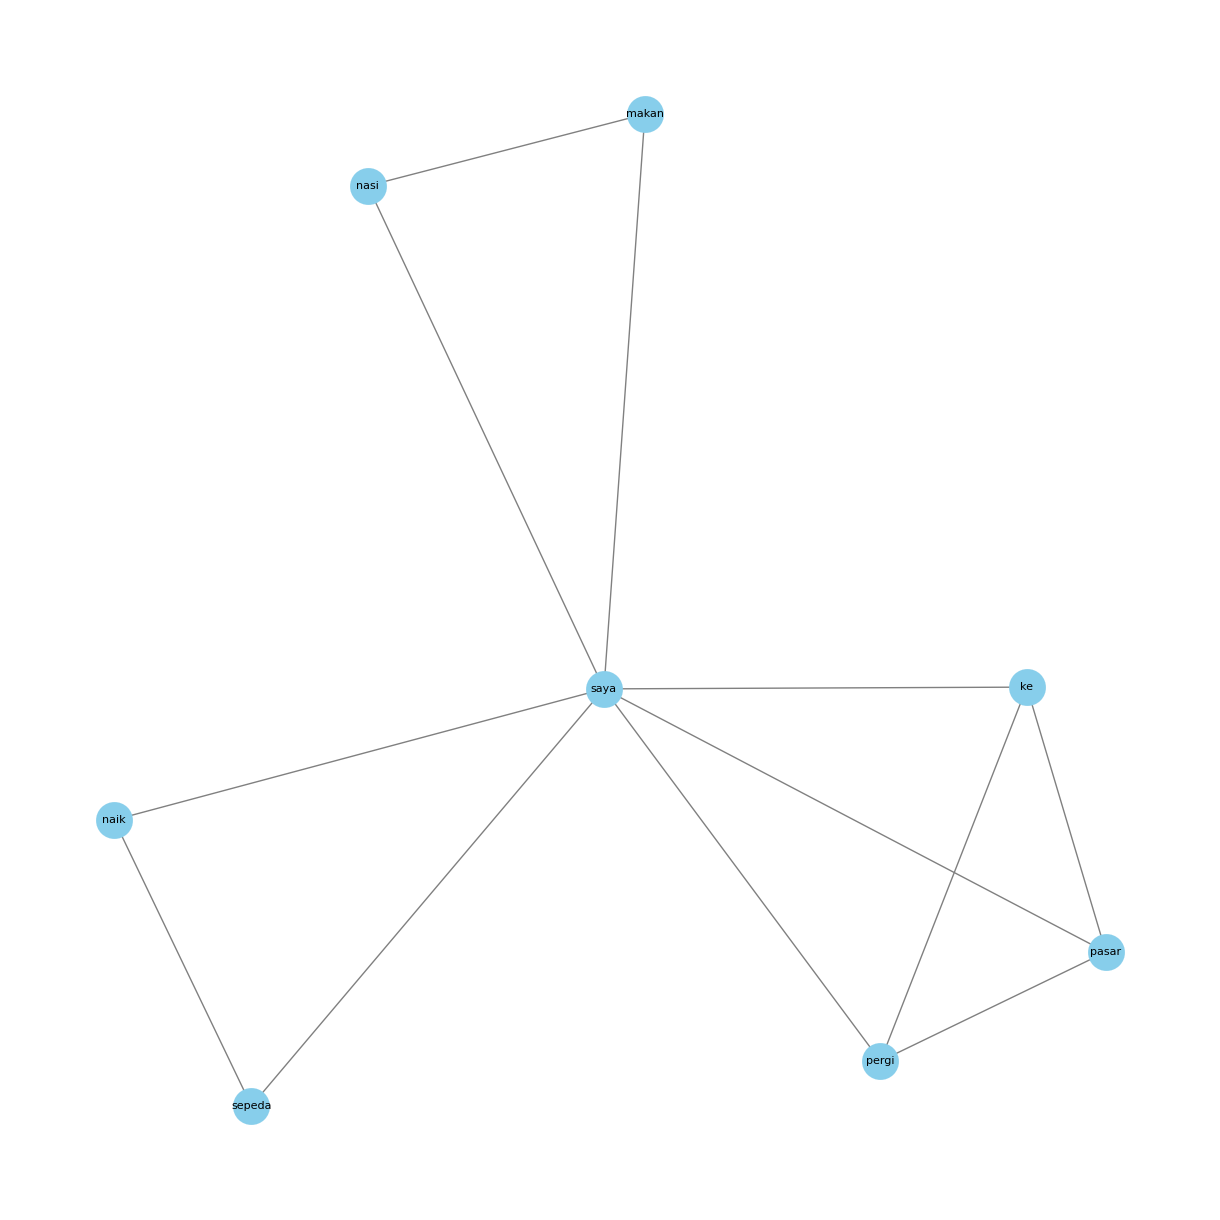

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
# Mengubah DataFrame Co-occurrence menjadi graf
G = nx.from_pandas_adjacency(co_occurrence_df)

# Menentukan posisi node pada graf
pos = nx.spring_layout(G)

# Menggambar graf
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=700, node_color='skyblue', edge_color='gray', linewidths=0.1)

# Menampilkan graf
plt.show()

## **Centrality**

### **Closeness Centrality**

In [16]:
# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'ke': 0.6363636363636364,
 'makan': 0.5833333333333334,
 'naik': 0.5833333333333334,
 'nasi': 0.5833333333333334,
 'pasar': 0.6363636363636364,
 'pergi': 0.6363636363636364,
 'saya': 1.0,
 'sepeda': 0.5833333333333334}

### **Page Rank**

In [17]:
pagerank = nx.pagerank(G)

In [18]:
pagerank

{'ke': 0.12046234618241228,
 'makan': 0.09078416558430245,
 'naik': 0.09078416558430245,
 'nasi': 0.09078416558430245,
 'pasar': 0.12046234618241228,
 'pergi': 0.12046234618241228,
 'saya': 0.27547629911555305,
 'sepeda': 0.09078416558430245}

## **Meranking node dari centrality**

In [19]:
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_closeness

{'saya': 1.0,
 'ke': 0.6363636363636364,
 'pasar': 0.6363636363636364,
 'pergi': 0.6363636363636364,
 'makan': 0.5833333333333334,
 'naik': 0.5833333333333334,
 'nasi': 0.5833333333333334,
 'sepeda': 0.5833333333333334}

## **Menentukan Kata penting berdasarkan ranking**

In [20]:
kalimat_tertinggi = []

for i in range(5):
    max_key = None
    max_value = None

    for key, value in sorted_closeness.items():
      if key not in kalimat_tertinggi and (max_value is None or value > max_value):
          max_key = key
          max_value = value

    if max_key is not None:
        kalimat_tertinggi.append(max_key)

In [21]:
kalimat_tertinggi

['saya', 'ke', 'pasar', 'pergi', 'makan']